# Function Transformers

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv(r'D:\Data Analytics\Python Scripts\Statistics\Pipeline\train.csv', usecols = ['Age', 'Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\harib\AppData\Local\Temp\ipykernel_21500\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [23]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)
xtrain, xtest, ytrain, ytest

(           Age      Fare
 30   40.000000   27.7208
 10    4.000000   16.7000
 873  47.000000    9.0000
 182   9.000000   31.3875
 876  20.000000    9.8458
 ..         ...       ...
 534  30.000000    8.6625
 584  29.699118    8.7125
 493  71.000000   49.5042
 527  29.699118  221.7792
 168  29.699118   25.9250
 
 [712 rows x 2 columns],
            Age     Fare
 707  42.000000  26.2875
 37   21.000000   8.0500
 615  24.000000  65.0000
 169  28.000000  56.4958
 68   17.000000   7.9250
 ..         ...      ...
 89   24.000000   8.0500
 80   22.000000   9.0000
 846  29.699118  69.5500
 870  26.000000   7.8958
 251  29.000000  10.4625
 
 [179 rows x 2 columns],
 30     0
 10     1
 873    0
 182    0
 876    0
       ..
 534    0
 584    0
 493    0
 527    0
 168    0
 Name: Survived, Length: 712, dtype: int64,
 707    1
 37     0
 615    1
 169    0
 68     1
       ..
 89     0
 80     0
 846    0
 870    0
 251    0
 Name: Survived, Length: 179, dtype: int64)

<Axes: >

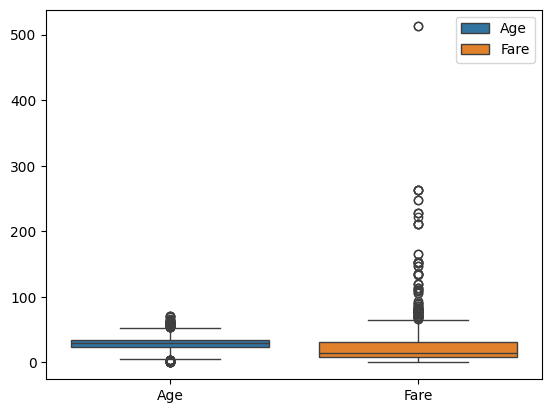

In [24]:
sns.boxplot(xtrain, legend='full')

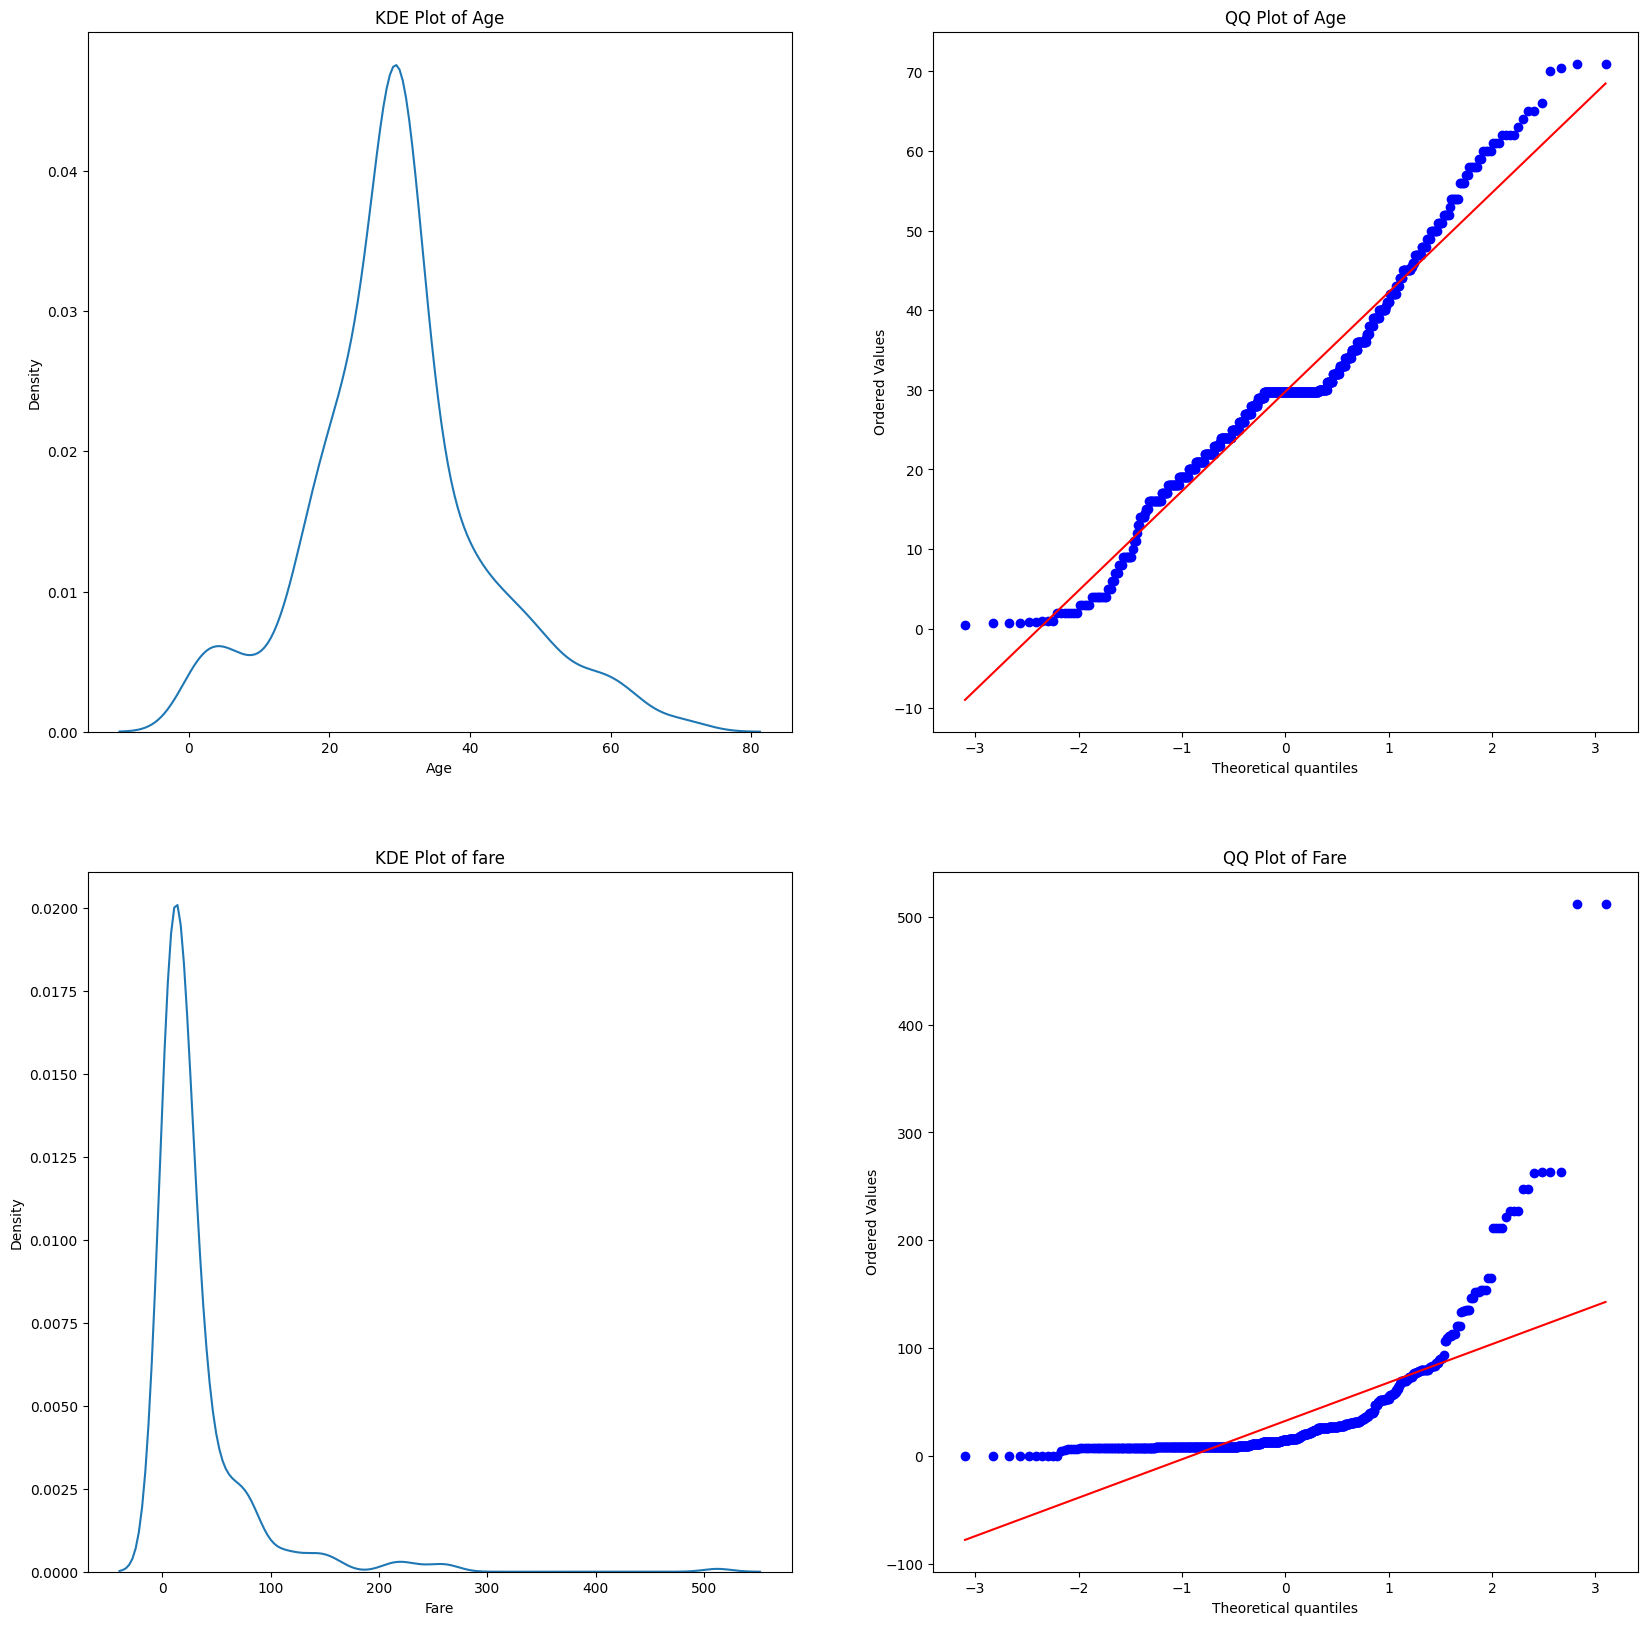

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.kdeplot(xtrain["Age"],ax=ax1)
ax1.set_title("KDE Plot of Age")
sns.kdeplot(xtrain["Fare"],ax=ax3)
ax3.set_title("KDE Plot of fare")
st.probplot(xtrain["Age"], dist="norm", plot=ax2)
ax2.set_title("QQ Plot of Age")
st.probplot(xtrain["Fare"], dist="norm", plot=ax4)
ax4.set_title("QQ Plot of Fare")
plt.show()

## Models

In [26]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()

lgr.fit(xtrain, ytrain)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [27]:
ypred_lgr = lgr.predict(xtest)
ypred_dtc = dtc.predict(xtest)

In [28]:
print(f'accuracy_score of Decision Tree Classifier is {accuracy_score(ytest, ypred_dtc)}')
print(f'accuracy_score of Logistic Regression is {accuracy_score(ytest, ypred_lgr)}')

accuracy_score of Decision Tree Classifier is 0.6089385474860335
accuracy_score of Logistic Regression is 0.6145251396648045


# Log Transformation

In [29]:
lgt = FunctionTransformer(func= np.log1p)

X_train_trainsformed = lgt.fit_transform(xtrain)
X_test_transformed  = lgt.fit_transform(xtest) 

In [30]:
lgr.fit(X_train_trainsformed, ytrain)
dtc.fit(X_train_trainsformed, ytrain)

DecisionTreeClassifier()

In [31]:
y_pred_lgr = lgr.predict(X_test_transformed)
y_pred_dtc = dtc.predict(X_test_transformed)

In [32]:
print(f'accuracy_score of Decision Tree Classifier is {accuracy_score(ytest, y_pred_dtc)}')
print(f'accuracy_score of Logistic Regression is {accuracy_score(ytest, y_pred_lgr)}')

accuracy_score of Decision Tree Classifier is 0.6145251396648045
accuracy_score of Logistic Regression is 0.6480446927374302


## Visualisation of features distribution after transformation

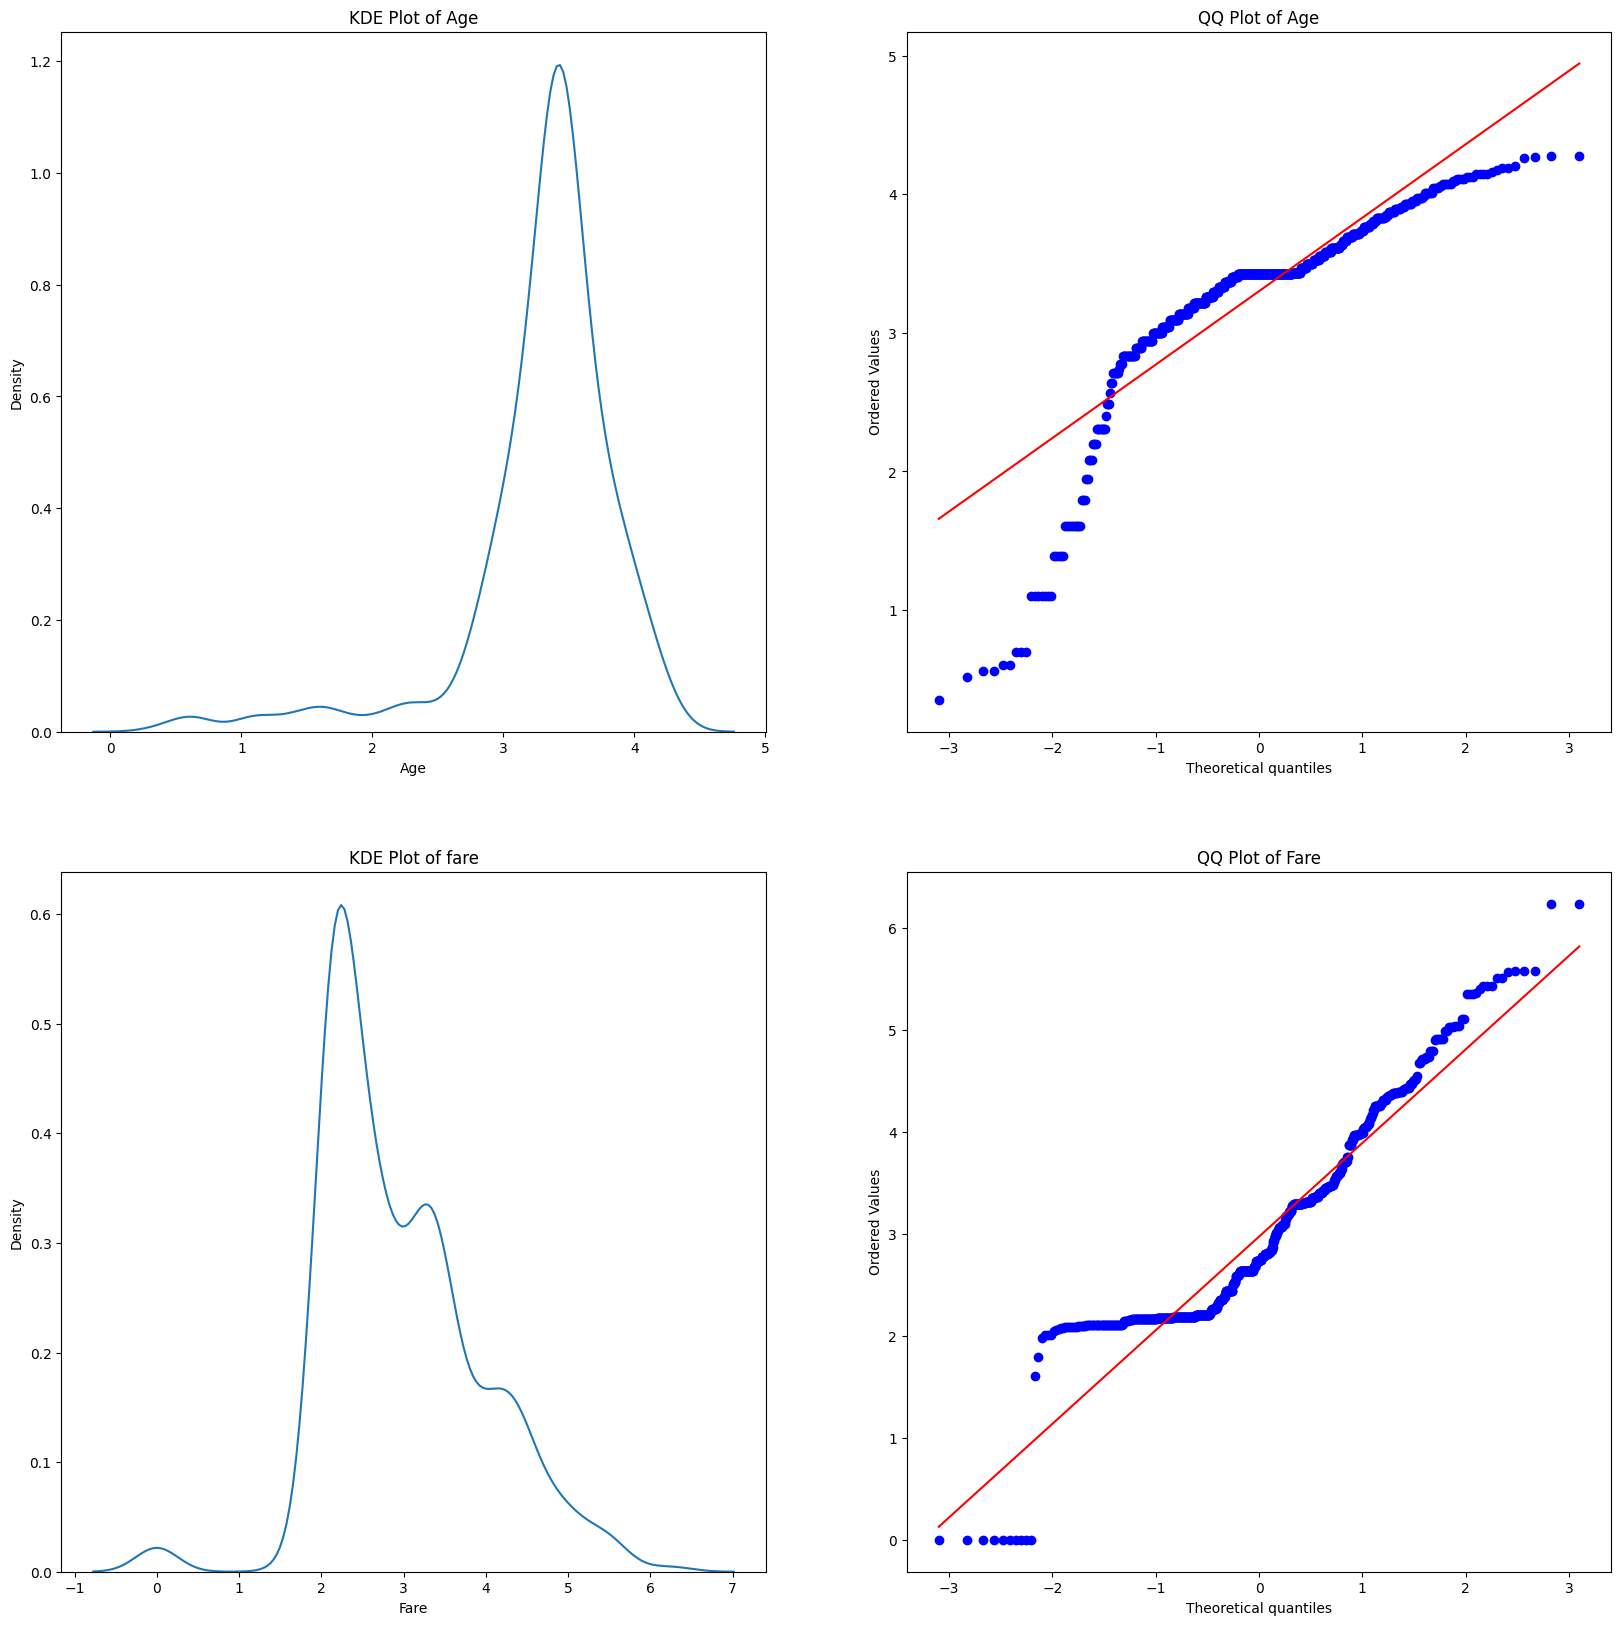

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.kdeplot(X_train_trainsformed["Age"],ax=ax1)
ax1.set_title("KDE Plot of Age")
sns.kdeplot(X_train_trainsformed["Fare"],ax=ax3)
ax3.set_title("KDE Plot of fare")
st.probplot(X_train_trainsformed["Age"], dist="norm", plot=ax2)
ax2.set_title("QQ Plot of Age")
st.probplot(X_train_trainsformed["Fare"], dist="norm", plot=ax4)
ax4.set_title("QQ Plot of Fare")
plt.show()

### Since log transformer is only used for right skewed data hence age feature become left skewed

# Creating a user defined function for accuracy prediction after transformation

In [34]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [35]:
def lg_transform(df, transform, target, var):
    """
    Apply transformation to one or more columns of a DataFrame and perform logistic regression.
    
    Parameters:
    - df: DataFrame containing the data
    - transform: Transformation function (e.g., np.log1p)
    - target: Index of the target column
    - var: Index or list of indices of the columns to be transformed
    
    Returns:
    - transformed: Transformed features after applying the transformation
    """
    
    # If var is an integer, convert it to a list to handle both single and multiple columns
    if isinstance(var, int):
        var = [var]
    
    # Get column names for the variables we want to transform
    var_columns = df.columns[var]

    # Select features except the target column
    X = df.drop(df.columns[target], axis=1)
    print(X)
    
    # Apply transformation to the columns specified in var_columns
    cltr = ColumnTransformer(
        [(f"transform_{col}", FunctionTransformer(func=transform), [col]) for col in var_columns], 
        remainder='passthrough'
    )
    
    # Transform the selected columns
    transformed = cltr.fit_transform(X)

    # Initialize the Logistic Regression model
    clf = LogisticRegression()

    # Perform cross-validation and calculate accuracy
    accuracy = np.mean(
        cross_val_score(
            clf, transformed, df.iloc[:, target], scoring="accuracy", cv=10
        )
    )

    print("Accuracy:", accuracy)

    return transformed

In [36]:
transformed = lg_transform(df, np.log1p, 0, 2)

           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]


Accuracy: 0.6712609238451936


In [37]:
transformed

array([[ 2.1102132 , 22.        ],
       [ 4.28059312, 38.        ],
       [ 2.18885633, 26.        ],
       ...,
       [ 3.19663022, 29.69911765],
       [ 3.4339872 , 26.        ],
       [ 2.1690537 , 32.        ]])

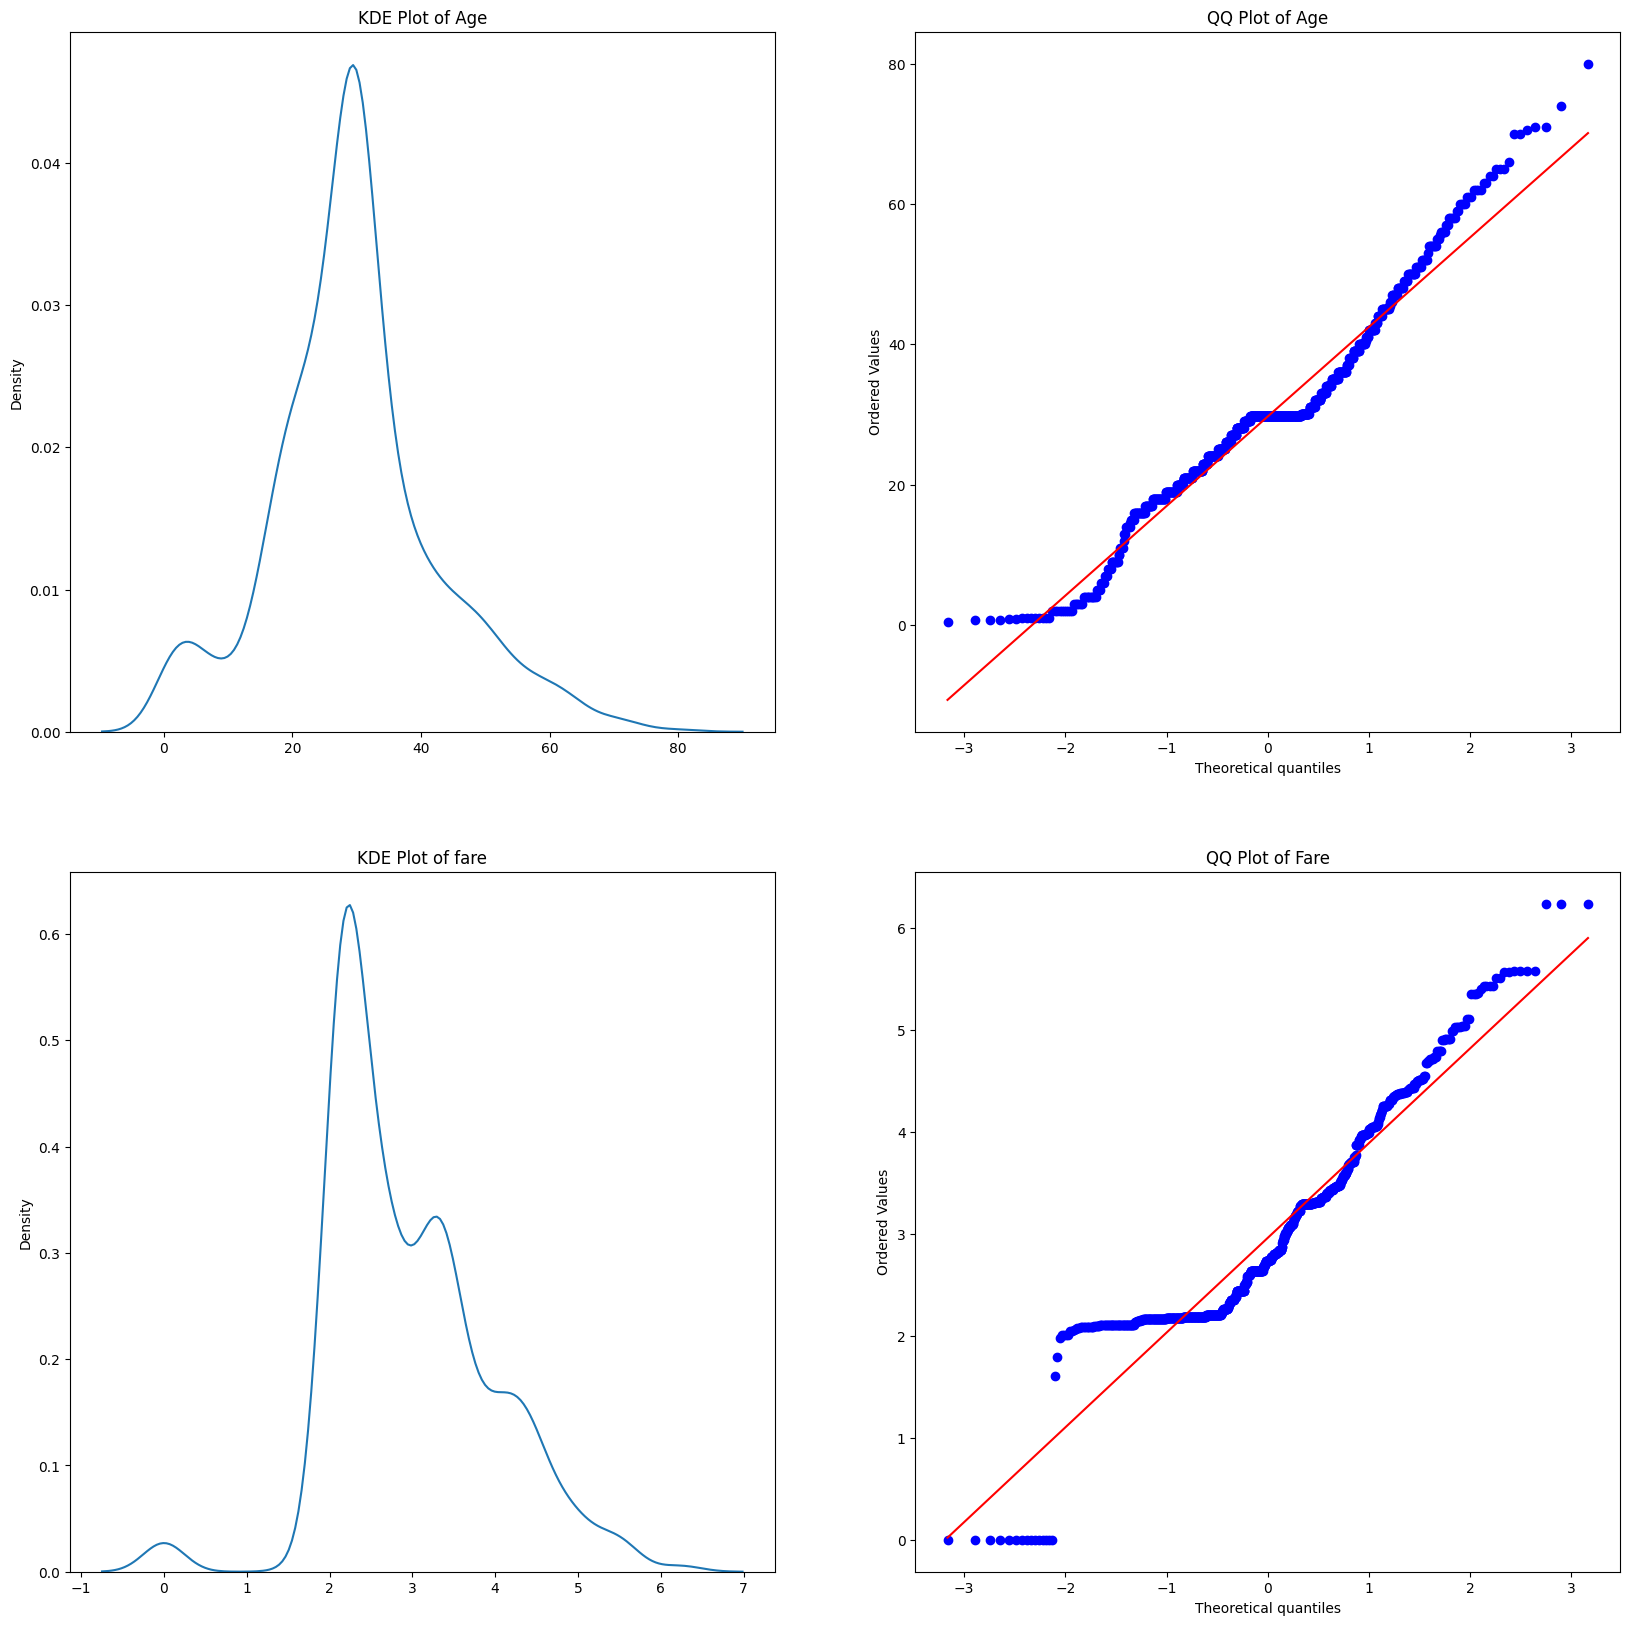

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.kdeplot(transformed[:,1],ax=ax1)
ax1.set_title("KDE Plot of Age")
sns.kdeplot(transformed[:,0],ax=ax3)
ax3.set_title("KDE Plot of fare")
st.probplot(transformed[:,1], dist="norm", plot=ax2)
ax2.set_title("QQ Plot of Age")
st.probplot(transformed[:,0], dist="norm", plot=ax4)
ax4.set_title("QQ Plot of Fare")
plt.show()